<a href="https://colab.research.google.com/github/junanote/test_deeplearning/blob/master/NaverShopping__BiLSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
!python -m pip install konlpy

In [94]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0   103k      0 --:--:-- --:--:-- --:--:--  103k


In [95]:
!bash ./mecab.sh

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [96]:
!curl -O https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 19.6M  100 19.6M    0     0   102M      0 --:--:-- --:--:-- --:--:--  102M


In [97]:
import pandas as pd
total_data = pd.read_table('./naver_shopping.txt', names=['ratings','reviews'])
total_data.head(10)

,ratings,reviews
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
5,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
6,1,주문을 11월6에 시켰는데 11월16일에 배송이 왔네요 ㅎㅎㅎ 여기 회사측과는 전화...
7,2,넉넉한 길이로 주문했는데도 안 맞네요 별로예요
8,2,보폴이 계속 때처럼 나오다가 지금은 안나네요~
9,2,110인데 전문속옷브랜드 위생팬티105보다 작은듯해요. 불편해요. 밴딩부분이 다 신...


In [98]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ratings  200000 non-null  int64 
 1   reviews  200000 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [99]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)
len(total_data)

199908

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_data = total_data['reviews']
y_data = total_data['ratings']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((149931,), (149931,), (49977,), (49977,))

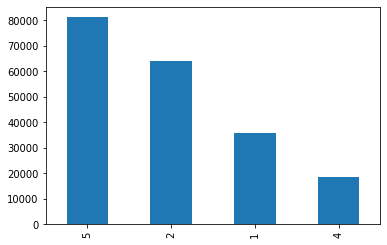

In [103]:
y_data.value_counts().plot(kind='bar')

# NLP(토큰화)


In [ ]:
type(x_train)
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ]','')

In [141]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','') #[a-zA-Z]]   불용어 처리전 한글만 가져오게... 대문자만 나오게

196938    리퍼 제품을 보내셨나 새제품에 스크레치 작렬 요청사항에 깔끔한 제품 바래는데 배송도...
67038          괜찮아요 코팅이 되어있어서 음식물 흘려도 걱정없고 구김은 시간이 지나면 펴지겠죠
17017     사용 첫날이라 성능적인 면은 아직 잘 모르겠으나 소음도 별로 안나고 디자인도 깜찍하...
194632    마낮다가농 라 ㅁㄴㅇ라봊 더로 ㅁ나ㅇ리벚 디소이라비ㄹㅈ더ㅁ나ㄹㅂ조다러ㅁ나ㅇ뢈너오라ㅂ...
55177     추천합니다 받자마자 발라보았는데 얇게 잘 발리네요 갖고있는 베이스코트보다 금방 말라...
                                ...                        
52062     설마맞겠지 하고 샀는데 집에있는 통은 다 안맞아요 구멍이 너무커서 걸수가없어요ㅠ 후...
169016                            천도 부드럽고 침대에 잘 밀착되어 좋은거같아요
1986                                    자석이 별로 안쎄서 줄이 헐거워져요
109619               제발 용기 좀 바꾸세요 펌핑 부분 돌려도 잘되지도 않고 쓰다가 욕나옴
23552                              리뷰보구 샀는데 신축성도 없고 별로네요 저는
Name: reviews, Length: 149931, dtype: object

In [106]:
from konlpy.tag import Mecab


In [107]:
mecab = Mecab()
print(mecab.morphs('와 이런 것도 상품이라고 차라리 내가 만드는게 나을 것 같다.'))

['와', '이런', '것', '도', '상품', '이', '라고', '차라리', '내', '가', '만드', '는', '게', '나을', '것', '같', '다', '.']


In [108]:
x_train_small = x_train[0:5000]

In [ ]:
sentance = list()
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

for tok in x_train_small :
  encoded = mecab.morphs(tok)
  sentance.append([item for item in encoded if item not in stopwords])

sentance  

## Tokenizer


In [110]:
print(sentance)

[['리퍼', '제품', '보내', '셨', '나', '.', '..', '새', '제품', '스', '크레', '치', '작렬', '.', '..', '요청', '사항', '깔끔', '제품', '바래', '는데', '.', '.', '배송', '늦', '.', '제품', '그렇', '네요', '.', '..', '검수', '좀', '제대로', '바랍니다', '.'], ['괜찮', '아요', '!', '!', '코팅', '되', '어', '있', '어서', '음식물', '흘려도', '걱정', '없', '.', '..', '구김', '시간', '지나', '면', '펴', '겠죠', '^^'], ['사용', '첫날', '라', '성능', '적', '면', '아직', '잘', '모르', '겠', '으나', '소음', '별로', '안', '나', '디자인', '깜찍', '니', '예쁩니다', '.', '더덕', '욱', '가격대', '오토', '모드', '있', '신기', '방기', '네요', '.'], ['마', '낮', 'ㅗ가ㅓ농', '라', 'ㅓㅗ', 'ㅣ', 'ㅁ', 'ㄴ', 'ㅇ라ㅓ봊', 'ㅏ더로', 'ㅁ', '나', 'ㅣ', 'ㅓㅇ리ㅏ벚', '디', '소', 'ㅓㅣㅓ이라ㅓ비', ';', 'ㅏㄹㅈ더ㅣㅁ나ㅓㄹ', ';', 'ㅣ', 'ㅂ', '조', ';', '러', 'ㅗㅁ나', ';', 'ㅓㅇ뢈너오라ㅓㅂ졷ㄹ', ';', '몬', 'ㅇ', ';', '러', ';', 'ㅣ', 'ㅁ', 'ㅈ', '덧', ';', 'ㅣ', 'ㅓㅁ니', ';', 'ㅇㄹ'], ['추천', '합니다', '받', '자마자', '발라', '보', '았', '는데', '얇', '잘', '발리', '네요', '.', '갖', '있', '베이스', '코트', '보다', '금방', '말라서', '좋', '아요', '.', '크기', '매우', '작', '은데', '요', '데', '싱', '디바', '브랜드', '믿', '구매', '했어요'], ['아직', '싸', '봐야', '알', '어떻게', 

In [111]:
import tensorflow as tf


In [112]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentance)  

In [ ]:
tokenizer.word_index   # 사전이 만들어짐

In [ ]:
tokenizer.word_counts  # 전체 문장에서 몇번 반복되었는지 확인

In [115]:
total_cnt = len(tokenizer.word_index) # 전체데이터를 돌림  모든거에서 레어에 해당되는 단어를 뺀 데이터를 만듬

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if(value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value # 2미만인 단어의 수 

In [116]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(8120, 5360, 66.00985221674877, 7.869661694730222)

In [117]:
vocab_size = total_cnt - rare_cnt

In [118]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(sentance)

In [ ]:
tokenizer.index_word   # -> 숫자로 만듬 

In [120]:
x_train_small = tokenizer.texts_to_sequences(sentance)

In [121]:
print(x_train_small[0:3]) # 리스트이므로 shape안됨

[[1, 46, 121, 287, 36, 2, 29, 330, 46, 498, 1012, 415, 1, 2, 29, 682, 1394, 140, 46, 1, 7, 2, 2, 14, 320, 2, 46, 442, 4, 2, 29, 655, 55, 378, 1225, 2], [92, 6, 22, 22, 1013, 20, 17, 9, 56, 2196, 1, 443, 31, 2, 29, 1395, 291, 444, 57, 1014, 1, 85], [27, 2197, 60, 719, 117, 57, 152, 8, 141, 43, 379, 499, 79, 10, 36, 177, 2198, 65, 1113, 2, 1, 1, 1396, 1, 1, 9, 1226, 1, 4, 2]]


In [122]:
len(x_train_small[0]), len(x_train_small[40]), len(x_train_small[50])

(36, 3, 31)

In [123]:
hist_len = [len(words) for words in x_train_small]  

(array([ 21.,  62., 159., 299., 689., 343., 281., 246., 408., 164., 162.,
        136., 237., 121., 106.,  91., 164.,  84.,  75.,  67., 143.,  67.,
         73.,  62.,  56.,  87.,  41.,  46.,  38.,  80.,  33.,  23.,  39.,
         63.,  21.,  25.,  21.,  34.,  14.,  23.,  20.,  21.,  12.,   8.,
          7.,  14.,   7.,   3.,   2.,   2.]),
 array([ 1.  ,  2.24,  3.48,  4.72,  5.96,  7.2 ,  8.44,  9.68, 10.92,
        12.16, 13.4 , 14.64, 15.88, 17.12, 18.36, 19.6 , 20.84, 22.08,
        23.32, 24.56, 25.8 , 27.04, 28.28, 29.52, 30.76, 32.  , 33.24,
        34.48, 35.72, 36.96, 38.2 , 39.44, 40.68, 41.92, 43.16, 44.4 ,
        45.64, 46.88, 48.12, 49.36, 50.6 , 51.84, 53.08, 54.32, 55.56,
        56.8 , 58.04, 59.28, 60.52, 61.76, 63.  ]),
 <a list of 50 Patch objects>)

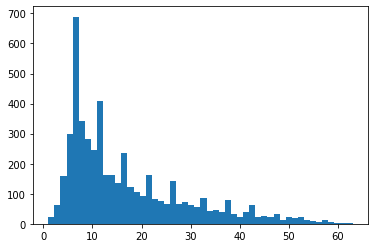

In [124]:
import matplotlib.pyplot as plt

plt.hist(hist_len, bins=50)

In [125]:
sum(hist_len)/len(x_train_small)

16.8546

In [126]:
x_train_small = tf.keras.preprocessing.sequence.pad_sequences(x_train_small, maxlen=50)

In [127]:
y_train_small = y_train[0:5000]

In [128]:
np.unique(y_train_small)

array([1, 2, 4, 5])

In [129]:
y_train_small = np.array(y_train_small)-1
np.unique(y_train_small)

array([0, 1, 3, 4])

In [130]:
y_train_small[0:6]

array([1, 4, 3, 4, 4, 1])

In [131]:
import numpy as np
np.unique(y_train_small)  #원핫인코딩이 0부터 시작

array([0, 1, 3, 4])

In [132]:
len(x_train_small),len(y_train_small)

(5000, 5000)

In [133]:
#y_train_onehot = tf.keras.utils.to_categorical(y_train_small)
#len(y_train_onehot[5])

# make model


In [134]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=50))  #dim은 사전사이즈, output 행렬의 방향의 값
#model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
#model.add(tf.keras.layers.GRU(128))
model.add(tf.keras.layers.Dense(5,activation='softmax'))  #의견을 내는 노드의 갯수 - 넘파이 유니크로 알수 있음
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  


In [135]:
model.fit(x_train_small, y_train_small, epochs=3, batch_size=256, validation_split=0.3, shuffle=True)  #shuffle 순서를 섞어줌

Epoch 1/3
14/14 [==============================] - 11s 568ms/step - loss: 1.4472 - acc: 0.3729 - val_loss: 1.2905 - val_acc: 0.3160
Epoch 2/3
14/14 [==============================] - 7s 500ms/step - loss: 1.2839 - acc: 0.4143 - val_loss: 1.2647 - val_acc: 0.4007
Epoch 3/3
14/14 [==============================] - 7s 498ms/step - loss: 1.2553 - acc: 0.4317 - val_loss: 1.2376 - val_acc: 0.4173
